# WeatherPy

---

### Import dependencies 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port moresby
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | rawson
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | rio gallegos
Processing Record 12 of Set 1 | rabo de peixe
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | pastavy
Processing Record 15 of Set 1 | balykshi
Processing Record 16 of Set 1 | pangoa
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | asau
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | laureles
Processing Record 22 of Set 1 | rikitea
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port moresby,-9.4431,147.1797,302.83,66,40,2.57,PG,1670200434
1,guerrero negro,27.9769,-114.0611,291.49,79,100,5.54,MX,1670200435
2,avarua,-21.2078,-159.7750,301.18,83,100,3.09,CK,1670200435
3,busselton,-33.6500,115.3333,291.51,62,100,4.69,AU,1670200436
4,sitka,57.0531,-135.3300,275.09,75,0,1.54,US,1670200437


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port moresby,-9.4431,147.1797,302.83,66,40,2.57,PG,1670200434
1,guerrero negro,27.9769,-114.0611,291.49,79,100,5.54,MX,1670200435
2,avarua,-21.2078,-159.7750,301.18,83,100,3.09,CK,1670200435
3,busselton,-33.6500,115.3333,291.51,62,100,4.69,AU,1670200436
4,sitka,57.0531,-135.3300,275.09,75,0,1.54,US,1670200437


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

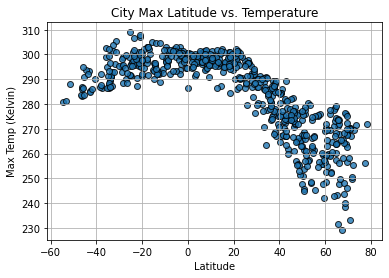

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha = 0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Kelvin)')
plt.grid()
plt.title('City Max Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

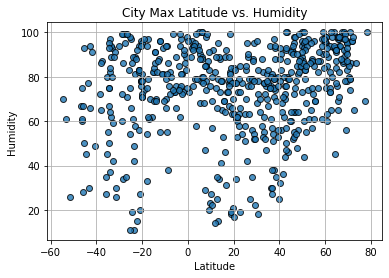

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha = 0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.title('City Max Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

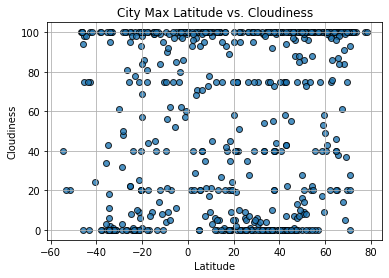

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha = 0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.title('City Max Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude Vs. Wind Speed

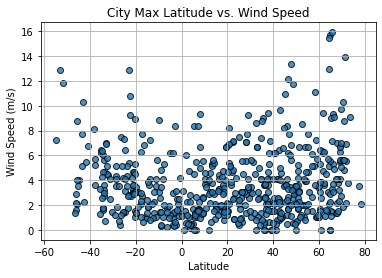

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha = 0.8, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.title('City Max Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def lin_regress(x_values, y_values, x_label, y_label, ann_x, ann_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (ann_x, ann_y), fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,guerrero negro,27.9769,-114.0611,291.49,79,100,5.54,MX,1670200435
4,sitka,57.0531,-135.3300,275.09,75,0,1.54,US,1670200437
5,kapaa,22.0752,-159.3190,301.33,73,40,4.63,US,1670200437
6,kodiak,57.7900,-152.4072,275.88,87,75,5.14,US,1670200438
10,rabo de peixe,37.8000,-25.5833,286.64,97,20,2.06,PT,1670200440


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port moresby,-9.4431,147.1797,302.83,66,40,2.57,PG,1670200434
2,avarua,-21.2078,-159.7750,301.18,83,100,3.09,CK,1670200435
3,busselton,-33.6500,115.3333,291.51,62,100,4.69,AU,1670200436
7,rawson,-43.3002,-65.1023,293.31,30,0,5.14,AR,1670200438
8,vaini,-21.2000,-175.2000,298.24,94,75,4.63,TO,1670200439


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8478426053525049


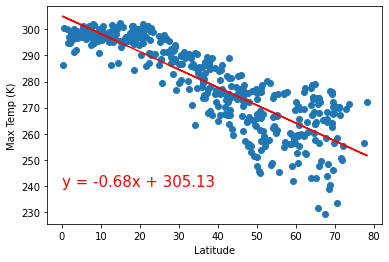

In [15]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp (K)"
ann_x = 0
ann_y = 240

lin_regress(x_values, y_values, x_label, y_label, ann_x, ann_y)

The r-value is: 0.5473892029629618


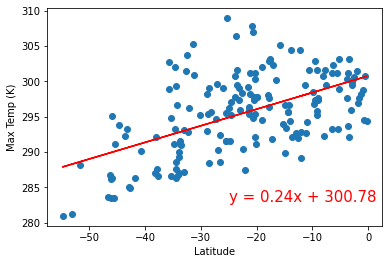

In [16]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label = "Latitude"
y_label = "Max Temp (K)"
ann_x = -25
ann_y = 283

lin_regress(x_values, y_values, x_label, y_label, ann_x, ann_y)

**Discussion about the linear relationship:** 
In the Northern Hemisphere, latitude and max temperature have a high negative coorelation. In the Southern Hemisphere, latitude and max temperature have a moderate positive coorelation. Both indicate that at a latitude closer to 0 the max temperature will be higher. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2725793825104763


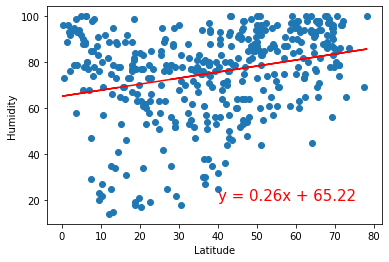

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
ann_x = 40
ann_y = 20

lin_regress(x_values, y_values, x_label, y_label, ann_x, ann_y)

The r-value is: 0.27505947134808056


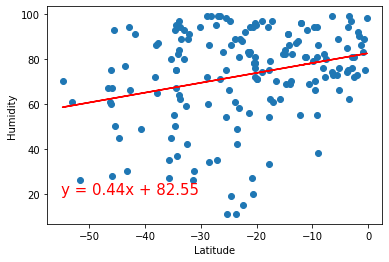

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_label = "Latitude"
y_label = "Humidity"
ann_x = -55
ann_y = 20

lin_regress(x_values, y_values, x_label, y_label, ann_x, ann_y)

**Discussion about the linear relationship:** In both the northern and southern hemispheres, the coorelation between the humidity and latitude is negligible. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20524883964151344


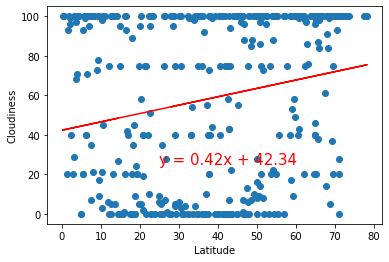

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
ann_x = 25
ann_y = 25

lin_regress(x_values, y_values, x_label, y_label, ann_x, ann_y)

The r-value is: 0.21276699082724376


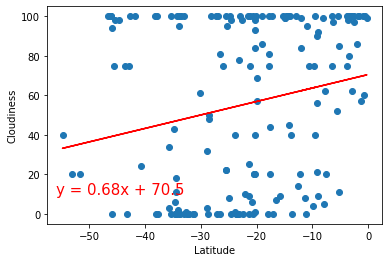

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_label = "Latitude"
y_label = "Cloudiness"
ann_x = -56
ann_y = 10

lin_regress(x_values, y_values, x_label, y_label, ann_x, ann_y)

**Discussion about the linear relationship:** In both the northern and southern hemispheres, the coorelation between the cloudiness and latitude is negligible. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.2505006087561005


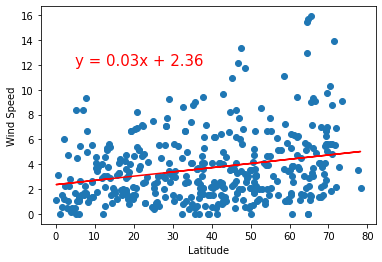

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
ann_x = 5
ann_y = 12

lin_regress(x_values, y_values, x_label, y_label, ann_x, ann_y)

The r-value is: -0.3751480528623119


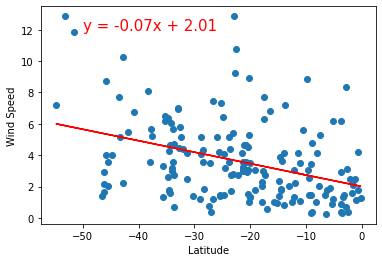

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label = "Latitude"
y_label = "Wind Speed"
ann_x = -50
ann_y = 12

lin_regress(x_values, y_values, x_label, y_label, ann_x, ann_y)

**Discussion about the linear relationship:** In both the northern and southern hemispheres, the coorelation between the wind speed and latitude is negligible.